In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os

In [127]:
#load data into dataframe
path = "C:/Users/daniy/Desktop/SEM3/INTRO TO AI (PYTHON)/Lab Assignment 3/Exercise#2_Daniyal"
filename = 'Ecom Expense.csv'
fullpath = os.path.join(path,filename) 
ecom_exp_daniyal = pd.read_csv(fullpath)

In [128]:
#display first 3 records
print(ecom_exp_daniyal.head(3))


  Transaction ID  Age   Items  Monthly Income  Transaction Time  Record  \
0         TXN001   42      10            7313        627.668127       5   
1         TXN002   24       8           17747        126.904567       3   
2         TXN003   47      11           22845        873.469701       2   

   Gender City Tier  Total Spend  
0  Female    Tier 1  4198.385084  
1  Female    Tier 2  4134.976648  
2    Male    Tier 2  5166.614455  


In [129]:
#display shape of dataframe
print(ecom_exp_daniyal.shape)


(2362, 9)


In [130]:
#display the column names
print(ecom_exp_daniyal.columns)


Index(['Transaction ID', 'Age', ' Items', 'Monthly Income', 'Transaction Time',
       'Record', 'Gender', 'City Tier', 'Total Spend'],
      dtype='object')


In [131]:
#display types of columns
print(ecom_exp_daniyal.dtypes)


Transaction ID       object
Age                   int64
 Items                int64
Monthly Income        int64
Transaction Time    float64
Record                int64
Gender               object
City Tier            object
Total Spend         float64
dtype: object


In [132]:
#display missing values in each column
print(ecom_exp_daniyal.isnull().sum())

Transaction ID      0
Age                 0
 Items              0
Monthly Income      0
Transaction Time    0
Record              0
Gender              0
City Tier           0
Total Spend         0
dtype: int64


In [133]:
#transform categorical variables (catvars) to numeric using get_dummies 
catvars=['Gender', 'City Tier']
for var in catvars:
    catlist = pd.get_dummies(ecom_exp_daniyal[var], prefix=var)
    ecom_exp_daniyal = ecom_exp_daniyal.join(catlist)

In [134]:
# drop original categorical columns
ecom_exp_daniyal = ecom_exp_daniyal.drop(catvars, axis=1)
# drop transaction id column
ecom_exp_daniyal = ecom_exp_daniyal.drop('Transaction ID', axis=1)

In [135]:
#function that normalizes all points in dataframe using formula
def normalize(df):
    normalizeddf = (df - df.min()) / (df.max() - df.min())
    return normalizeddf
# use normalize function on the dataset
ecom_exp_daniyal = normalize(ecom_exp_daniyal)

In [136]:
# print first 2 records
print(ecom_exp_daniyal.head(2))

    Age     Items  Monthly Income  Transaction Time  Record  Total Spend  \
0  0.55  0.642857        0.189663          0.627058     0.5     0.241242   
1  0.10  0.500000        0.562346          0.126412     0.3     0.236305   

   Gender_Female  Gender_Male  City Tier_Tier 1  City Tier_Tier 2  \
0            1.0          0.0               1.0               0.0   
1            1.0          0.0               0.0               1.0   

   City Tier_Tier 3  
0               0.0  
1               0.0  


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':' Items'}>,
        <AxesSubplot:title={'center':'Monthly Income'}>],
       [<AxesSubplot:title={'center':'Transaction Time'}>,
        <AxesSubplot:title={'center':'Record'}>,
        <AxesSubplot:title={'center':'Total Spend'}>],
       [<AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>,
        <AxesSubplot:title={'center':'City Tier_Tier 1'}>],
       [<AxesSubplot:title={'center':'City Tier_Tier 2'}>,
        <AxesSubplot:title={'center':'City Tier_Tier 3'}>,
        <AxesSubplot:>]], dtype=object)

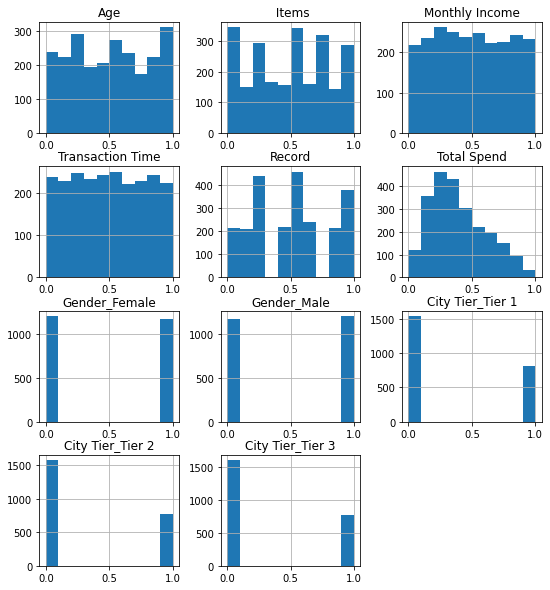

In [137]:
# plot histogram showing all variables
ecom_exp_daniyal.hist(figsize = (9, 10))

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Monthly Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Transaction Time', ylabel='Age'>,
        <AxesSubplot:xlabel='Total Spend', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Monthly Income'>,
        <AxesSubplot:xlabel='Monthly Income', ylabel='Monthly Income'>,
        <AxesSubplot:xlabel='Transaction Time', ylabel='Monthly Income'>,
        <AxesSubplot:xlabel='Total Spend', ylabel='Monthly Income'>],
       [<AxesSubplot:xlabel='Age', ylabel='Transaction Time'>,
        <AxesSubplot:xlabel='Monthly Income', ylabel='Transaction Time'>,
        <AxesSubplot:xlabel='Transaction Time', ylabel='Transaction Time'>,
        <AxesSubplot:xlabel='Total Spend', ylabel='Transaction Time'>],
       [<AxesSubplot:xlabel='Age', ylabel='Total Spend'>,
        <AxesSubplot:xlabel='Monthly Income', ylabel='Total Spend'>,
        <AxesSubplot:xlabel='Transaction Time', ylabel='Total Spend'>,
       

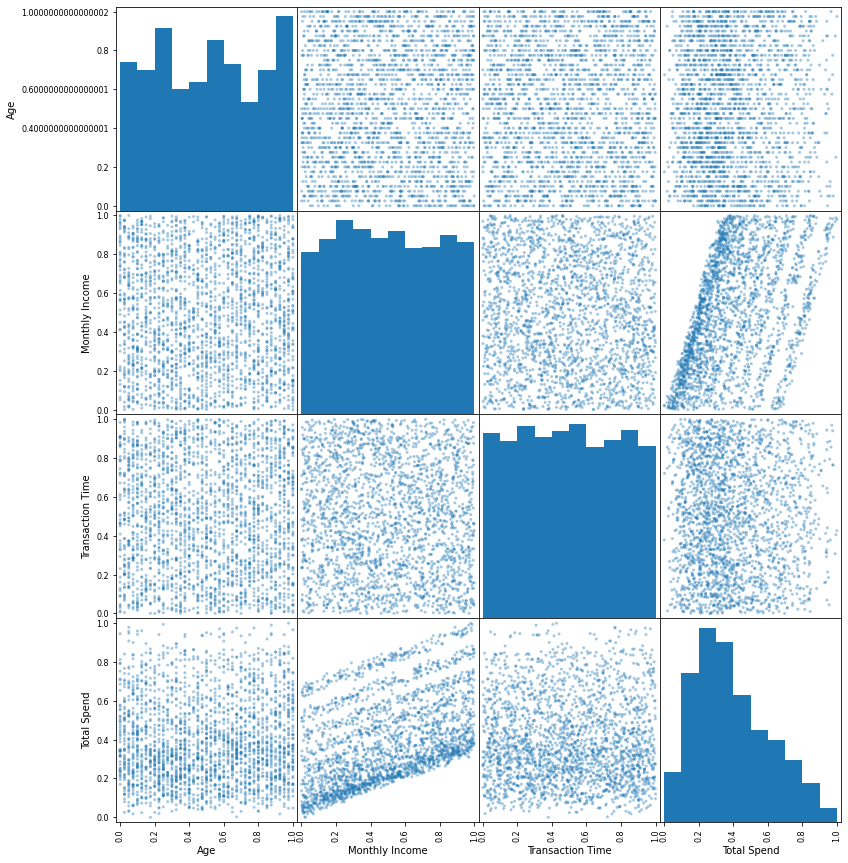

In [138]:
# plot scattermatrix with alpha = 0.4 and figsize = 13x15
pd.plotting.scatter_matrix(ecom_exp_daniyal[['Age',
                                             'Monthly Income',
                                             'Transaction Time',
                                             'Total Spend']], alpha = 0.4, figsize = (13, 15))


In [141]:
#create data to turn into train and test data using predictor variables and output variable 'Total Spend'
featurecols = ['Monthly Income', 
               'Transaction Time', 
               'Gender_Female', 
               'Gender_Male',
               'City Tier_Tier 1', 
               'City Tier_Tier 2', 
               'City Tier_Tier 3']
x = ecom_exp_daniyal[featurecols]
y = ecom_exp_daniyal['Total Spend']

In [142]:
#split data into training and testing data
x_train_daniyal, x_test_daniyal, y_train_daniyal, y_test_daniyal = train_test_split(x, y, test_size = 0.35)


In [143]:
# sets seed to 72
np.random.seed(72)

In [144]:
#build linear regression model using training data
lr = LinearRegression()
lr.fit(x_train_daniyal, y_train_daniyal)

LinearRegression()

In [145]:
# display coefficients 
print(lr.coef_)

[ 3.28560847e-01  2.61365277e-02 -7.58105483e+12 -7.58105483e+12
 -3.14651399e+13 -3.14651399e+13 -3.14651399e+13]


In [146]:
# display model score(r-squared)
print(lr.score(x_train_daniyal, y_train_daniyal))

0.19446499744845758


In [147]:
# adds 'Record' to the feature list
featurecols2 = ['Monthly Income', 
                'Transaction Time', 
                'Record', 
                'Gender_Female', 
                'Gender_Male',
                'City Tier_Tier 1', 
                'City Tier_Tier 2', 
                'City Tier_Tier 3']
x = ecom_exp_daniyal[featurecols2]
y = ecom_exp_daniyal['Total Spend']

In [148]:
# splits into training and testing data
x_train_daniyal, x_test_daniyal, y_train_daniyal, y_test_daniyal = train_test_split(x, y, test_size = 0.35)

In [149]:
# sets seed to 72
np.random.seed(72)

In [150]:
# builds a linear regression model using training data
lr = LinearRegression()
lr.fit(x_train_daniyal, y_train_daniyal) 

LinearRegression()

In [151]:
# display coefficients
print(lr.coef_)

[ 0.317778    0.00880612  0.60630512 -0.0096819   0.0096819   0.00656044
  0.00322064 -0.00978108]


In [152]:
# display score/rsquared value
print(lr.score(x_train_daniyal, y_train_daniyal))

0.9192472393833668
